## GOAL: Using Sensor data, predict how many useful lifecycles of the fan remain
Important Note: Train dataset runs until failure. Test data set runs until is stopped, and RUL is given in RUL_FD001.txt

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import data as train and test with appropriate columns

In [56]:
columns = ["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [57]:
train1 = pd.read_csv('train_FD001.txt',sep=' ',names = columns)

In [58]:
test1 = pd.read_csv('test_FD001.txt',sep=' ',names = columns)

In [59]:
test_res = pd.read_csv('RUL_FD001.txt',sep=' ',header=None)

### Exploratory Data analysis, view data format and 'feel' it out

In [60]:
train1.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [61]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [62]:
train1.describe()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


### Drop sensor 22 and sensor 23 as they appear to be all NaN values

In [63]:
train1.drop(['sensor22','sensor23'],axis=1,inplace=True)

### For Training Data, using max cycle, calculate the RUL of every data point
Sensor data is taken at multiple points in time for 100 different fans. Group by fan id, give every data point an 'answer' for RUL

In [64]:
train1['RUL'] = train1.groupby('id').transform(max)['cycle'] - train1['cycle']

In [65]:
train1.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


### Similarily transform Test Data
test data is given in 2 files: test_FD001 and RUL_FD001. Have to add the RUL from RUL_FD001 to the max value of cycle for each fan in the test file. Then from cycle failed, calculate RUL for each data point.

In [66]:
test1.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [67]:
test_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    int64  
 1   1       0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [68]:
test_res.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [69]:
test_res.columns = ['RUL','NaN']

In [70]:
test_res.head()

,RUL,NaN
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [71]:
test_res['id'] = test_res.index + 1

In [72]:
test_res.head()

,RUL,NaN,id
0,112,NaN,1
1,98,NaN,2
2,69,NaN,3
3,82,NaN,4
4,91,NaN,5


In [73]:
test_res.drop(['NaN'],axis=1,inplace=True)

In [74]:
test_res.head()

,RUL,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [75]:
max_cyc = test1.groupby('id').max()['cycle'].reset_index()
max_cyc.head()

,id,cycle
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [76]:
test_res['cycle_failed'] = max_cyc['cycle'] + test_res['RUL']
test_res.head()

,RUL,id,cycle_failed
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [77]:
test1 = test1.merge(test_res, on = 'id', how = 'left')

In [78]:
test1.drop(['sensor22','sensor23','RUL'],axis=1,inplace=True)

In [79]:
test1.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,cycle_failed
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,143
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,143


In [80]:
train1.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [81]:
test1['RUL'] = test1['cycle_failed'] - test1['cycle']

In [82]:
test1.drop('cycle_failed',axis=1,inplace=True)

In [83]:
test1.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138


### Now that data is adequately formatted, perform train test split
Also drop id and RUL from training dataset. Split training data for validation set and keep test set to test performance.
***potential issue with this noted . Training different examples from same engine can help 'cheat' to find correct RUL. More on this later

In [84]:
from sklearn.model_selection import train_test_split

In [128]:
X = train1.drop(['id', 'RUL'],axis=1)
y = train1['RUL']

In [129]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=101)

## First Try Simple Linear Regression
Simple linear model. Later decided innacurate and poor choice do to inflexibility and possible linear dependance between variables.

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
lm = LinearRegression()

In [132]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Predicted Y')

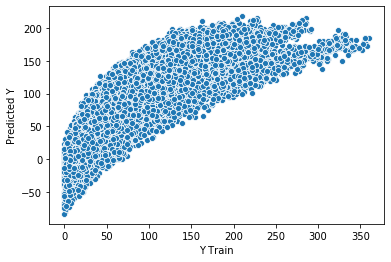

In [133]:
predtrain = lm.predict(X_train)
sns.scatterplot(y_train,predtrain)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y')

In [134]:
pred = lm.predict(X_test)

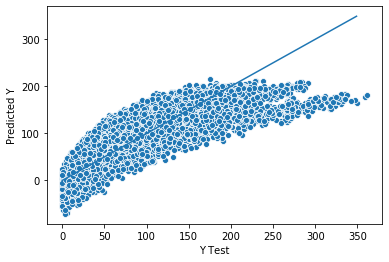

In [170]:
sns.scatterplot(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(range(0,350),range(0,350))

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [137]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 31.244970620039744
MSE: 1650.9996536529156
RMSE: 40.63249504587327


Mediocre performance. Underpredicts at high levels of RUL

## Try Random Forest Regressor
Solves issue of linearity and provides much more flexible fit. Quick to implement and see if have the right idea. 

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rfr = RandomForestRegressor(n_estimators=600)

In [140]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [141]:
rfpred = rfr.predict(X_test)

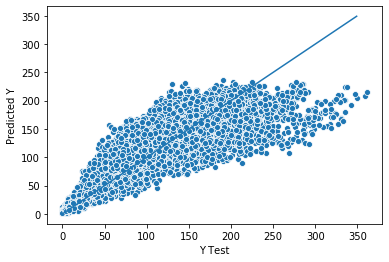

In [171]:
sns.scatterplot(y_test,rfpred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(range(0,350),range(0,350))

In [143]:
rfr.score(X_test, y_test)

0.7235480523256754

In [144]:
print('MAE:', mean_absolute_error(y_test, rfpred))
print('MSE:', mean_squared_error(y_test, rfpred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rfpred)))

MAE: 25.252342487883684
MSE: 1307.034604804099
RMSE: 36.15293355737676


Slightly better results, more expected shape to Predicted vs Test. Harder to predict with more RUL, which is to be expected. Still have doubts about whether containing multiple datapoints from each engine id may skew results. Will test on test set for final result.

## Try a Dense ANN
See if a neural net can predict better than RFR. 

In [145]:
X_v = X.values
y_v = y.values

In [146]:
X_train, X_test, y_train, y_test =  train_test_split(X_v, y_v, test_size=0.33, random_state=101)

In [147]:
from sklearn.preprocessing import MinMaxScaler

In [148]:
scaler = MinMaxScaler()

In [149]:
X_train = scaler.fit_transform(X_train)

In [150]:
X_test = scaler.transform(X_test)

In [151]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

2 hidden layers, trained on MSE with adam optimizer. Relu activation to add nonlinearity.

In [159]:
model = Sequential()

model.add(Dense(25,  activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(13, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(units=1,activation='relu'))


model.compile(loss='MSE', optimizer='adam')

In [160]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 13822 samples, validate on 6809 samples
Epoch 1/25
13822/13822 [==============================] - 1s 40us/sample - loss: 16284.3511 - val_loss: 16122.1826
Epoch 2/25
13822/13822 [==============================] - 0s 11us/sample - loss: 15408.2324 - val_loss: 14229.0522
Epoch 3/25
13822/13822 [==============================] - 0s 10us/sample - loss: 11734.8522 - val_loss: 8277.3341
Epoch 4/25
13822/13822 [==============================] - 0s 10us/sample - loss: 7375.3558 - val_loss: 5491.5319
Epoch 5/25
13822/13822 [==============================] - 0s 10us/sample - loss: 6615.8765 - val_loss: 5064.4117
Epoch 6/25
13822/13822 [==============================] - 0s 11us/sample - loss: 6092.0458 - val_loss: 4503.2897
Epoch 7/25
13822/13822 [==============================] - 0s 10us/sample - loss: 5421.7289 - val_loss: 3867.7022
Epoch 8/25
13822/13822 [==============================] - 0s 10us/sample - loss: 4744.2874 - val_loss: 3161.7749
Epoch 9/25
13822/13822 [==================

In [161]:
from tensorflow.keras.models import load_model

In [162]:
losses = pd.DataFrame(model.history.history)

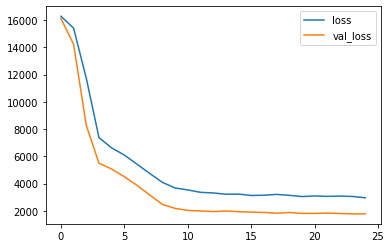

In [163]:
losses[['loss','val_loss']].plot()

In [164]:
nnpred = model.predict(X_test)

In [165]:
nnpred = nnpred.reshape(6809,)

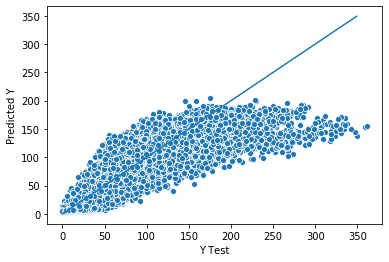

In [172]:
sns.scatterplot(y_test,nnpred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(range(0,350),range(0,350))

In [167]:
print('MAE:', mean_absolute_error(y_test, nnpred))
print('MSE:', mean_squared_error(y_test, nnpred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, nnpred)))

MAE: 29.621000220411798
MSE: 1775.8613193223164
RMSE: 42.14096960586356


Neural Net performs worse than RFR. Can try GBM  for better predictive accuracy. Issue with data points sharing engine id still an issue. 

### Notes for Further Analysis
- Need to better visualize what is happening with sensors, will include more graphical representations
- Including every sensor is probably overkill, several may show little to no change and just be adding noise
- Submitting single data point is most likely handicapping model. Should make use of all the data. In addition to sensor value, would be a good idea to include variance, and rate of change over sensor lifetime as inputs. Thought process being that sensor of failing fan would begin to either increase, decrease, or behave very erratically. 
- Consider 2 sensor reading from same engine at different points in time (A-earlier, B-later). Training a model with the RUL to A most likely provides skewed predictive advantage of determining RUL of B.
- Possible solution would be to take one point in time randomly from each engine id and compose training set this way.Could use this with fans FD002-FD004 for larger training data, and sample with replacement 4 or so times from each engine id. This way no one engine would skew the data.
- want final format of model to be something that learns as it predicts (as fan lifetime goes on) might implement RNN
- have been advised to look at gaussian processes
